In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/all_data_20200501.csv', index_col='date', date_parser=dateparse, dtype='float')

/home/tatsuki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [4]:
data.tail()

,total
date,
2020-04-27,166.0
2020-04-28,276.0
2020-04-29,197.0
2020-04-30,94.0
2020-05-01,165.0


In [5]:
ts = data['total']

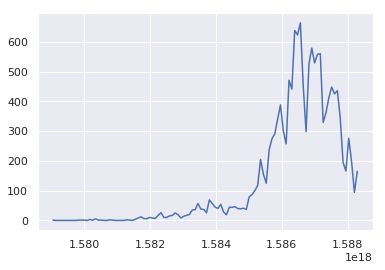

In [6]:
plt.plot(data.index,ts)

In [7]:
diff = ts.diff()
diff = diff.dropna()

In [8]:
params = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')

/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [9]:
print(params)

{'aic':              0            1            2
0          NaN  1183.121455  1178.237295
1  1183.584312  1181.921337  1180.235276
2  1178.744040  1180.059568  1181.889609
3  1180.565647  1181.978915  1183.889606
4  1182.056430  1183.053392  1157.373946, 'aic_min_order': (4, 2)}


In [10]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(ts, order=(4,1,2)).fit(dist=False)

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:714: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
/home/tats

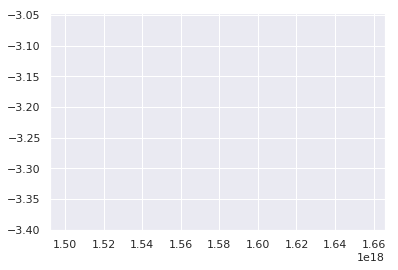

In [11]:
resid = arima_model.resid
plt.plot(resid)

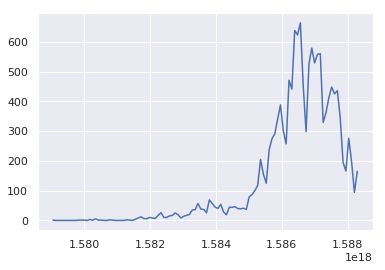

In [12]:
predict = arima_model.predict('2020-04-20', '2020-05-10')
plt.plot(ts) # 実データをプロット
plt.plot(predict) # 予測データをプロット

In [13]:
sarima_model = sm.tsa.SARIMAX(ts, order=(4,1,2), seasonal_order=(1,1,1,7)).fit()  # 1週間周期

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: Co

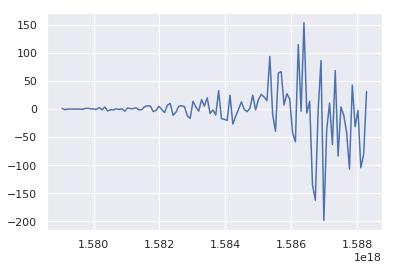

In [14]:
plt.plot(sarima_model.resid)

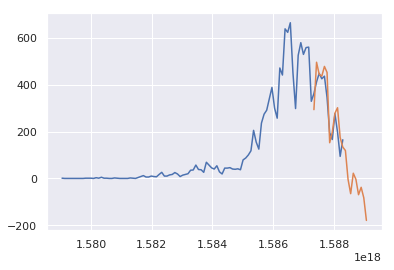

In [15]:
predict = sarima_model.predict('2020-04-20', '2020-05-10')
plt.plot(ts) # 実データをプロット
plt.plot(predict) # 予測データをプロット

In [16]:
print(predict)

2020-04-20    293.342224
2020-04-21    495.528921
2020-04-22    444.313713
2020-04-23    436.160790
2020-04-24    477.714107
2020-04-25    452.044832
2020-04-26    152.279657
2020-04-27    197.507719
2020-04-28    278.128019
2020-04-29    301.505176
2020-04-30    174.217580
2020-05-01    133.802995
2020-05-02    118.863555
2020-05-03     -3.917241
2020-05-04    -65.053346
2020-05-05     22.180103
2020-05-06     -3.899080
2020-05-07    -69.423043
2020-05-08    -37.878655
2020-05-09    -82.651481
2020-05-10   -179.101566
Freq: D, dtype: float64
